Task 3: Load in the Dataset in your Jupyter Notebook

In [11]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Task 4: Generate Descriptive Statistics and Visualizations

Task 4.1: Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

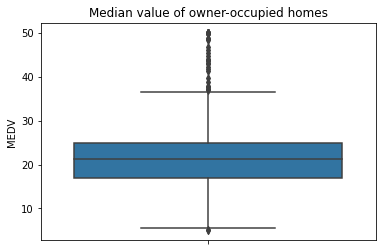

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats

ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Median value of owner-occupied homes')

Task 4.2: Provide a  histogram for the Charles river variable

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram for the Charles River Variable'}, xlabel='CHAS'>

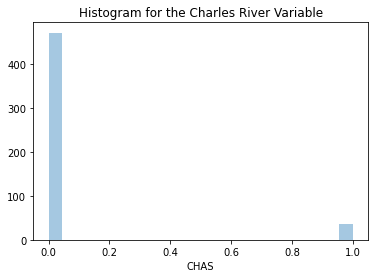

In [13]:
ax1 = sns.distplot(boston_df['CHAS'], kde = False)
ax1.set_title('Histogram for the Charles River Variable')
ax1

Task 4.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable')

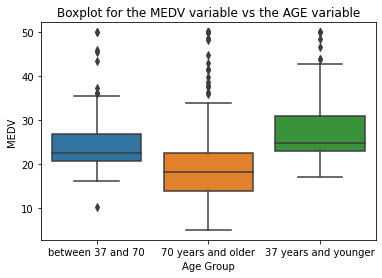

In [14]:
boston_df.loc[(boston_df['AGE'] <=37), 'Age Group'] = '37 years and younger'
boston_df.loc[(boston_df['AGE'] >37)&(boston_df['AGE'] <=70),'Age Group'] = 'between 37 and 70'
boston_df.loc[(boston_df['AGE'] >70), 'Age Group'] = '70 years and older'

ax2 = sns.boxplot(x='Age Group', y='MEDV', data=boston_df)
ax2.set_title('Boxplot for the MEDV variable vs the AGE variable')

Task 4.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Acording to the scatter plot, these two variables are positively correlated.


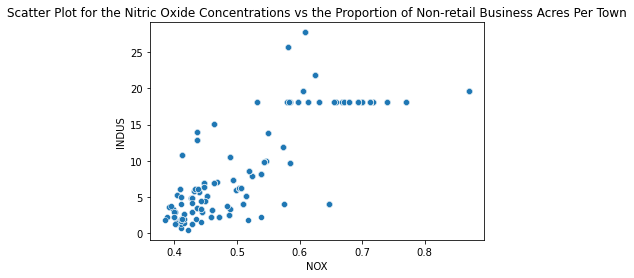

In [15]:
ax3 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax3.set_title('Scatter Plot for the Nitric Oxide Concentrations vs the Proportion of Non-retail Business Acres Per Town')

print('Acording to the scatter plot, these two variables are positively correlated.')

Task 4.5: Create a histogram for the pupil to teacher ratio variable

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for the Pupil to Teacher Ratio')

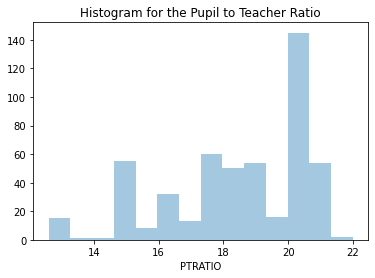

In [16]:
ax4 = sns.distplot(boston_df['PTRATIO'], kde = False)
ax4.set_title('Histogram for the Pupil to Teacher Ratio')

Task 5: Use the appropriate tests to answer the questions provided.

Be sure to:
- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

Question 5.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: $There is no difference in median values of houses bounded by the charles river. 
*   $H\_1: $There is a difference in median values of houses bounded by the charles river. 

In [20]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)


Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Because the T-test p-value is smaller than alpha, it's reasonable to reject the null hypothesis.

Question 5.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: $There is no difference in median values of houses (MEDV) for each proportion of owner occupied units prior to 1940(AGE). 
*   $H\_1: $There is a difference in median values of houses (MEDV) for each proportion of owner occupied units prior to 1940(AGE). 

In [25]:
scipy.stats.levene(boston_df['AGE'], boston_df['MEDV'], center = 'mean')
f_statistic, p_value = scipy.stats.f_oneway(boston_df['AGE'],boston_df['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1223.1740271875935, P-Value: 3.20946197250671e-176


Becuase the F-test p-value is smaller than alpha, it's reasonable to reject the null hypothesis.

Question 5.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


State the hypothesis

*   $H\_0: $There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 
*   $H\_1: $There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 

In [24]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Because the p-value is smaller than alpha, it's reasonable to reject the null hypothesis.

Question 5.4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [26]:
X= boston_df['DIS']
y=boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        11:04:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Because the p-value is smaller than alpha, it's reasonable to reject the null hypothesis.